# Neural Networks for Data Science Applications
## Implementing a custom activation function

In [ ]:
import tensorflow as tf
import numpy as np

### Introduction

The **exponential linear unit** (ELU) is an activation function defined as [1]:

$$
\phi(x) =
\Biggl\{ 
\begin{align} 
x & \;\; \text{ if } x \ge 0 \\
\alpha \left(\exp\left(x\right)- 1\right) & \;\; \text{ otherwise } 
\end{align}
\Bigr.
\,,
$$

where $\alpha$ is a hyper-parameter. The function is implemented in `tf.keras.layers.ELU` (see the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ELU)).

The **parametric ELU** (PELU) extends the ELU activation function as [2]:

$$
\phi(x) =
\Biggl\{ 
\begin{align} 
\frac{\alpha}{\beta}x & \;\; \text{ if } x \ge 0 \\
\alpha \left(\exp\Bigl(\frac{x}{\beta}\Bigr)- 1\right) & \;\; \text{ otherwise } 
\end{align}
\Bigr.
\,,
$$

where the major difference is that $\alpha,\beta > 0$ are *trainable* parameters, i.e., a pair of $(\alpha, \beta)$ values is trained for each unit in the network.

### implementing the PELU

In TensorFlow, it is possible to implement new layers by subclassing `tf.keras.layers.Layer`:

+ [Making new Layers and Models via subclassing](https://www.tensorflow.org/guide/keras/custom_layers_and_models)
+ [Custom layers](https://www.tensorflow.org/tutorials/customization/custom_layers)
+ [tf.keras.layers.Layer (documentation)](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)


In [ ]:
class PELU(tf.keras.layers.Layer):
    def __init__(self, units=32):
        super(PELU, self).__init__()
        self.units = units

    def build(self, input_shape):
      self.alpha = self.add_weight(
          name = 'alpha',
          shape=(input_shape[-1], ), initializer="ones", trainable=True)
      
      self.beta = self.add_weight(
          name= 'beta',
          shape=(input_shape[-1],), initializer="ones", trainable=True)

    def call(self, inputs):
      alpha = tf.clip_by_value(self.alpha, clip_value_min=0.1, clip_value_max=np.inf)
      beta = tf.clip_by_value(self.beta, clip_value_min=0.1, clip_value_max=np.inf)
      res = tf.where(inputs >= 0, alpha/beta * inputs, alpha * (tf.exp(inputs / beta) - 1))
      return res

### some preliminary tests


In [ ]:
pelu = PELU(units=1)

 plot the function using the skeleton code below.

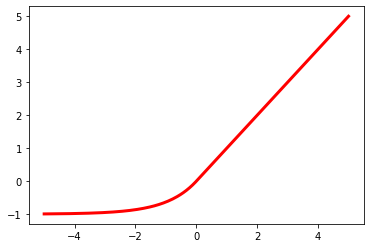

In [ ]:
import matplotlib.pyplot as plt
x_range = tf.linspace(-5., 5., 200) # An equispaced grid of 200 points in [-5, +5]
y_range = pelu(x_range) # TODO: Your code here

plt.plot(x_range.numpy(), y_range.numpy(), 'r', linewidth= 3)

The derivative of a PELU function with respect to the $\alpha$ parameter is given by [2]:

$$
\frac{d\phi(x)}{d\alpha} =
\Biggl\{ 
\begin{align} 
\frac{x}{\beta} & \;\; \text{ if } x \ge 0 \\
 \left(\exp\Bigl(\frac{x}{\beta}\Bigr)- 1\right) & \;\; \text{ otherwise } 
\end{align}
\Bigr.
\,,
$$

In [ ]:
# Inorder to check the correctness, we first compute the derivative using automatic differentiation and then compare it with the manual derivative:

# Automatic
with tf.GradientTape(persistent=True) as t:
  y = pelu(x_range)

Grad = t.gradient(y, pelu.alpha)

# Manual 
def pelu_prime(inputs):
  res = tf.where(inputs >= 0, inputs / pelu.beta, (tf.exp(inputs / pelu.beta) - 1))
  return res

ManualPrime = pelu_prime(x_range)

In [ ]:
Grad

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([-0.99326205, -0.9929148 , -0.99254966, -0.99216574, -0.991762  ,
       -0.9913374 , -0.990891  , -0.9904216 , -0.98992795, -0.98940885,
       -0.98886305, -0.9882891 , -0.98768556, -0.98705095, -0.9863836 ,
       -0.9856819 , -0.98494405, -0.9841681 , -0.9833522 , -0.98249424,
       -0.9815921 , -0.98064345, -0.9796459 , -0.9785969 , -0.97749394,
       -0.9763341 , -0.97511446, -0.97383195, -0.9724834 , -0.9710653 ,
       -0.96957415, -0.96800613, -0.9663573 , -0.9646236 , -0.9628004 ,
       -0.9608833 , -0.95886743, -0.95674765, -0.9545186 , -0.9521747 ,
       -0.94971   , -0.94711834, -0.94439304, -0.94152737, -0.93851393,
       -0.93534523, -0.9320132 , -0.92850953, -0.92482525, -0.92095107,
       -0.91687727, -0.91259354, -0.90808904, -0.9033524 , -0.8983716 ,
       -0.8931341 , -0.88762677, -0.8818356 , -0.87574595, -0.8693425 ,
       -0.862609  , -0.85552853, -0.84808314, -0.84025407, -0.83202153,
       -0.823364

In [ ]:
ManualPrime

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([-0.99326205, -0.9929148 , -0.99254966, -0.99216574, -0.991762  ,
       -0.9913374 , -0.990891  , -0.9904216 , -0.98992795, -0.98940885,
       -0.98886305, -0.9882891 , -0.98768556, -0.98705095, -0.9863836 ,
       -0.9856819 , -0.98494405, -0.9841681 , -0.9833522 , -0.98249424,
       -0.9815921 , -0.98064345, -0.9796459 , -0.9785969 , -0.97749394,
       -0.9763341 , -0.97511446, -0.97383195, -0.9724834 , -0.9710653 ,
       -0.96957415, -0.96800613, -0.9663573 , -0.9646236 , -0.9628004 ,
       -0.9608833 , -0.95886743, -0.95674765, -0.9545186 , -0.9521747 ,
       -0.94971   , -0.94711834, -0.94439304, -0.94152737, -0.93851393,
       -0.93534523, -0.9320132 , -0.92850953, -0.92482525, -0.92095107,
       -0.91687727, -0.91259354, -0.90808904, -0.9033524 , -0.8983716 ,
       -0.8931341 , -0.88762677, -0.8818356 , -0.87574595, -0.8693425 ,
       -0.862609  , -0.85552853, -0.84808314, -0.84025407, -0.83202153,
       -0.823364

In [ ]:
# Now we check if they're giving the same value
print('The Automatic and Manual differentiation are elementwise similar up to (1e-4) precision : ',tf.reduce_all(tf.abs(Grad - ManualPrime ) < 1e-4).numpy())

The Automatic and Manual differentiation are elementwise similar up to (1e-4) precision :  True


In [ ]:
tf.reduce_all(tf.abs(Grad - ManualPrime ) < 1e-4)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

Try the same for the $\beta$ parameter 

In [ ]:
# Automatic
with tf.GradientTape(persistent=True) as t:
  y = pelu(x_range)

GradBeta = t.gradient(y, pelu.beta)

# Manual 
def pelu_primeBeta(inputs):
  res = tf.where(inputs >= 0, ((- pelu.alpha) * inputs) / (pelu.beta)**2, ((- pelu.alpha)* inputs * tf.exp(inputs / pelu.beta)) / (pelu.beta)**2  )
  return res

ManualPrimeBeta = pelu_primeBeta(x_range)

In [ ]:
# Now we check if they're giving the same value
print('The Automatic and Manual differentiation RESPECT TO BETA are elementwise similar up to (1e-4) precision : ',tf.reduce_all(tf.abs(Grad - ManualPrime ) < 1e-4).numpy())

The Automatic and Manual differentiation RESPECT TO BETA are elementwise similar up to (1e-4) precision :  True


In [ ]:
tf.reduce_all(tf.abs(GradBeta - ManualPrimeBeta ) < 1e-4)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

### Exercise 3: PELU in practice

Consider a simple model built with the PELU activation function, as below.

In [ ]:
# For this part, I used the MNIST datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizing the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Model with PELU layer
modelPelu = tf.keras.Sequential(layers=[
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(50, name='1st_layer'),
      PELU(50),
      tf.keras.layers.Dense(10, name='output_layer',activation='softmax')
])

Load any classification dataset, and train the model above (using either a custom training loop or `model.fit(...)`). Additionally, compare with a standard ReLU activation.

In [ ]:
modelPelu.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
historyPelu = modelPelu.fit(x=x_train,y=y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3643 - accuracy: 0.8978
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1858 - accuracy: 0.9451
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1339 - accuracy: 0.9597
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1047 - accuracy: 0.9678
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0841 - accuracy: 0.9741
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0710 - accuracy: 0.9775
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.9815
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9839
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0432 - accuracy: 0.9862
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [ ]:
# Results of evaluating by the model with PELU layer
evalPelu = modelPelu.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.9691


Now with the RELU activation function

In [ ]:
# Now Model with Relu activation function instead of our PELU

modelRelu = tf.keras.Sequential(layers=[
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(50,  name='1st_layer'),
      tf.keras.layers.Dense(50,  name='RELU', activation='relu'),
      tf.keras.layers.Dense(10,  name='output_layer', activation='softmax')
])

In [ ]:
modelRelu.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
historyRelu = modelRelu.fit(x=x_train,y=y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3600 - accuracy: 0.8963
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1889 - accuracy: 0.9439
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1442 - accuracy: 0.9562
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1195 - accuracy: 0.9632
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1030 - accuracy: 0.9679
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0896 - accuracy: 0.9716
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0809 - accuracy: 0.9742
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0721 - accuracy: 0.9773
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0663 - accuracy: 0.9790
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

In [ ]:
# Results of evaluating by the model with Relu activation function
evalRelu = modelRelu.evaluate(x_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.9635


In [ ]:
print("Accuracy with PELU : ", evalPelu[1], ",  Loss with PELU: ", evalPelu[0])
print("Accuracy with Relu : ", evalRelu[1], ",  Loss with PELU: ", evalRelu[0])

Accuracy with PELU :  0.9690999984741211 ,  Loss with PELU:  0.3662984073162079
Accuracy with Relu :  0.9635000228881836 ,  Loss with PELU:  0.38348546624183655


As you can see the accuracy by PELU is slightly better than with ReLU activation Function

Here I will plot the model's architecture and their accuracy results

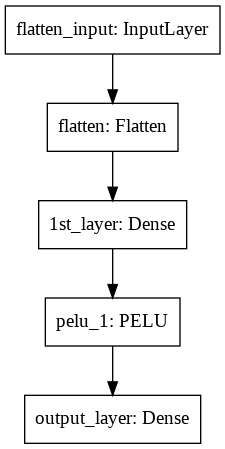

In [ ]:
# Models' architectures

from keras.utils import plot_model
plot_model(modelPelu, to_file='model.png')

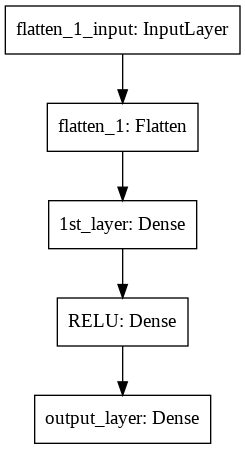

In [ ]:
plot_model(modelRelu, to_file='model1.png')

The Accuracy difference of PELU and ReLU

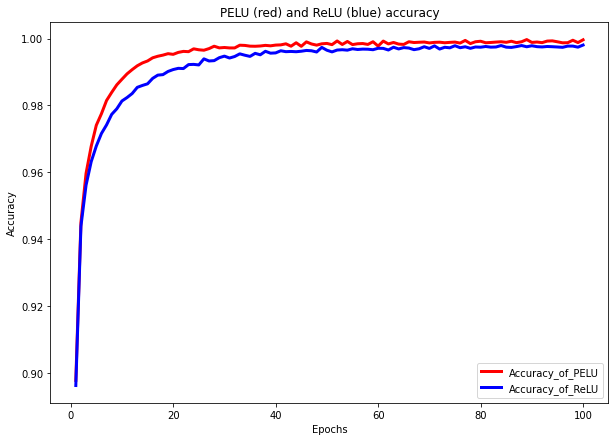

In [ ]:
plt.figure(figsize=(10,7))
loss_train = historyPelu.history["accuracy"]
loss_trainR = historyRelu.history["accuracy"]
epochs = range(1,101)
plt.plot(epochs, loss_train, 'r', label='Accuracy_of_PELU', linewidth=3)
plt.plot(epochs, loss_trainR, 'b', label='Accuracy_of_ReLU', linewidth=3)
plt.title('PELU (red) and ReLU (blue) accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Understanding saving/loading of models

TensorFlow has several options for saving or loading objects from the disk:

1. [Save and load Keras models](https://www.tensorflow.org/guide/keras/save_and_serialize/)

In many cases, custom classes require the implementation of a `get_config` / `from_config` functions to define the serialization behaviour.


In [ ]:
modelPelu.save('pelu_model')
del PELU # This is needed to remove any reference to PELU from memory
reloaded_model = tf.keras.models.load_model('pelu_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: pelu_model/assets


In [ ]:
print("Original model:", modelPelu)
print("Loaded model:", reloaded_model) # Observe that the object has been dynamically recreated in absence of the configuration options

Original model: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9f60396390>
Loaded model: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9efc1eae80>


### References

[1] Clevert, D.A., Unterthiner, T. and Hochreiter, S., 2015. [Fast and accurate deep network learning by exponential linear units (ELUs)](https://arxiv.org/abs/1511.07289). arXiv preprint arXiv:1511.07289.

[2] Trottier, L., Gigu, P. and Chaib-draa, B., 2017. [Parametric exponential linear unit for deep convolutional neural networks](https://arxiv.org/abs/1605.09332). In 2017 16th IEEE International Conference on Machine Learning and Applications (ICMLA) (pp. 207-214). IEEE.